In [ ]:
from google.colab import files
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
uploaded = files.upload()

Saving Cleaned_Price.csv to Cleaned_Price.csv


In [ ]:
Btc = pd.read_csv('Cleaned_Price.csv')

Btc.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Year,Month
0,0,2014-09-17,465.864014,468.174011,452.421997,457.334015,21056800.0,2014,9
1,1,2014-09-18,456.859985,456.859985,413.104004,424.440002,34483200.0,2014,9
2,2,2014-09-19,424.102997,427.834991,384.532013,394.795990,37919700.0,2014,9
3,3,2014-09-20,394.673004,423.295990,389.882996,408.903992,36863600.0,2014,9
4,4,2014-09-21,408.084991,412.425995,393.181000,398.821014,26580100.0,2014,9


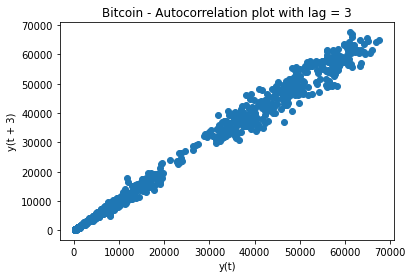

In [ ]:
plt.figure()
lag_plot(Btc['Close'], lag=3)
plt.title('Bitcoin - Autocorrelation plot with lag = 3')
plt.show()

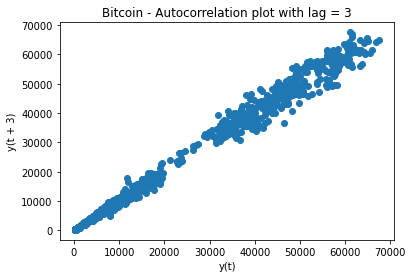

In [ ]:
plt.figure()
lag_plot(Btc['Open'], lag=3)
plt.title('Bitcoin - Autocorrelation plot with lag = 3')
plt.show()

We can now confirm that ARIMA is going to be a good model to be applied to this type of data (there is auto-correlation in the data).

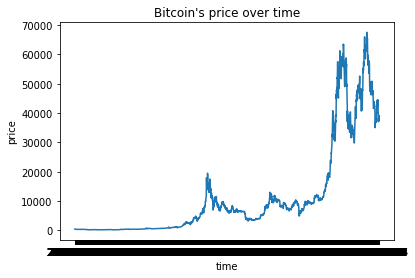

In [ ]:
plt.plot(Btc["Date"], Btc["Close"])
plt.title("Bitcoin's price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [ ]:
train_data, test_data = Btc[0:int(len(Btc)*0.65)], Btc[int(len(Btc)*0.65):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 1594413.33908923


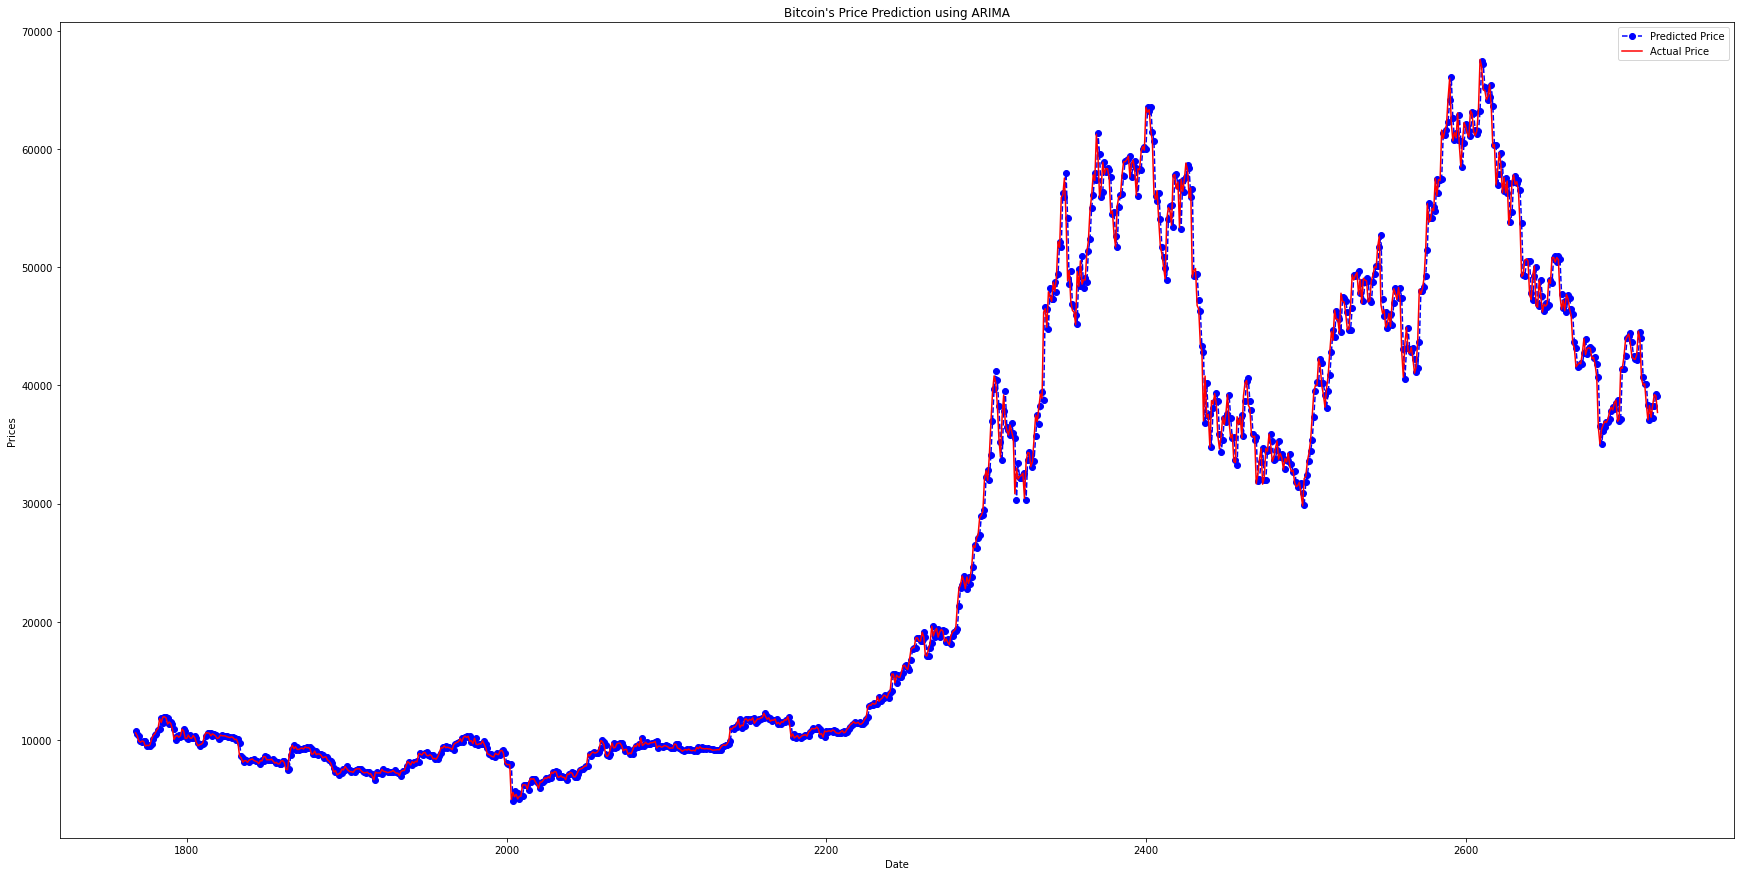

In [ ]:
test_set_range = Btc[int(len(Btc)*0.65):].index
plt.figure(figsize=(30,15))
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('Bitcoin\'s Price Prediction using ARIMA')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend()
plt.show()

In [ ]:
# Forecast Error

#machinelearningmastery.com/time-series-forecasting-performance-measures-with-python
import statistics
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
test_data = list(np.array(test_data, dtype = 'float'))
model_predictions = list(np.array(model_predictions, dtype = 'float'))

forecast_errors = [test_data[i] - model_predictions[i] for i in range(len(test_data))]

forecast_errors1 = []
for i in forecast_errors:
  forecast_errors1.append(float(i))

print(forecast_errors1)

#Mean Forecast Error
mean_forecast_eror1 = statistics.mean(forecast_errors1)
print(mean_forecast_eror1)


bias = sum(forecast_errors1) * 1.0/len(test_data)
print('Bias: %f' % bias)

#Mean Absolute Error

MAE = mean_absolute_error(test_data,model_predictions)
print(MAE)

#Mean Squared Error
MSE = mean_squared_error(test_data,model_predictions)
print(MSE)
#RMSE
print(math.sqrt(MSE))

# R2 Score

print(r2_score(test_data, model_predictions))

[-182.19857186716035, -183.61237369233277, -456.6483861038432, -70.68467987101576, 74.028374339945, -66.87682163932186, -422.34176990064225, 75.12639153587043, -47.62083205389354, 87.25010355483391, 442.32461008479004, 300.2256675955323, 114.14876646377161, 305.1401477677882, 163.94120035048036, 852.9606734571662, -356.1528548342503, 511.6295295942673, -5.846781254247617, -42.49496334460309, -537.104639366893, 206.0670908765096, -164.37910393950006, -485.9603880472023, -870.7136801514207, 283.2872993088349, 21.636303914086966, -163.7439646956991, 64.30695588062554, 570.9269052700583, -170.57635826089972, -619.1006972303603, 5.146972599373839, 285.824451809176, -265.8171920201876, -43.647644931023024, 216.07085036483295, -181.86407739112292, -436.13249401995563, -244.57876594207482, 92.03840473019591, 11.035911861583372, 103.39207826973143, 565.7909478054553, 258.5219205452504, -25.595638086169856, -14.506933546497748, -199.16419428530753, 181.64907379018769, -96.45652442803657, -102.43